In [2]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import xarray as xr
import pandas as pd

import os
import pickle

In [4]:
# M = 'GFDL-CM4'
# M = 'ACCESS-ESM1-5'
# M = 'MPI-ESM1-2-HR'
M = 'EC-Earth3'

In [67]:
seaice_data_fpath = 'data_siconc0/' + M + '.pickle'
with open(seaice_data_fpath, 'rb') as f:
    seaice_data = pickle.load(f)

mld2000_data_fpath = 'data_mld/' + M + '.pickle'
with open(mld2000_data_fpath, 'rb') as f:
    mld2000_data = pickle.load(f)

In [69]:
### M = 'EC-Earth3'
mld2000_ws = mld2000_data['mld2kfq'].where((mld2000_data['mld2kfq'].longitude > 300) | (mld2000_data['mld2kfq'].longitude < 30))
sea_ice_ws = seaice_data.where(mld2000_ws>0).mean(('i','j'))

In [62]:
### M = 'ACCESS-ESM1-5'
mld2000_rs = mld2000_data['mld2kfq'].where((mld2000_data['mld2kfq'].longitude > 180) & (mld2000_data['mld2kfq'].longitude < 240))
sea_ice_rs = seaice_data.where(mld2000_rs>0).mean(('i','j'))

mld2000_ws = mld2000_data['mld2kfq'].where((mld2000_data['mld2kfq'].longitude > 300) | (mld2000_data['mld2kfq'].longitude < 30))
sea_ice_ws = seaice_data.where(mld2000_ws>0).mean(('i','j'))

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath
import cmocean
import seaborn as sns

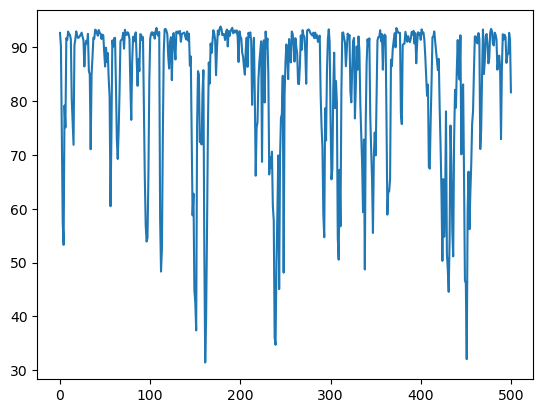

In [70]:
plt.plot(sea_ice_ws)

In [45]:
mld2000_rs = mld2000_data['mld2kfq'].where((mld2000_data['mld2kfq'].lon > -210) & (mld2000_data['mld2kfq'].lon < -120))
sea_ice_rs = seaice_data.where(mld2000_rs>0).mean(('x','y'))

In [6]:
sae_ice_timeseries_savepath = 'OSM/' + M + '.pickle'
with open(sae_ice_timeseries_savepath, 'wb') as sf:
    pickle.dump(sea_ice_rs, sf, pickle.HIGHEST_PROTOCOL)

NameError: name 'sea_ice_rs' is not defined

In [7]:
sae_ice_timeseries_savepath_ws = 'OSM/' + M + '_ws.pickle'
with open(sae_ice_timeseries_savepath_ws, 'wb') as sf:
    pickle.dump(sea_ice_ws, sf, pickle.HIGHEST_PROTOCOL)

sae_ice_timeseries_savepath_rs = 'OSM/' + M + '_rs.pickle'
with open(sae_ice_timeseries_savepath_rs, 'wb') as sf:
    pickle.dump(sea_ice_rs, sf, pickle.HIGHEST_PROTOCOL)

NameError: name 'sea_ice_ws' is not defined

In [71]:
sae_ice_timeseries_savepath = 'OSM/' + M + '.pickle'
with open(sae_ice_timeseries_savepath, 'wb') as sf:
    pickle.dump(sea_ice_ws, sf, pickle.HIGHEST_PROTOCOL)

In [18]:
with open('OSM/GFDL-CM4_conind_rs.pickle', 'rb') as f:
    conind = pickle.load(f)

with open('OSM/GFDL-CM4_heat_rs.pickle', 'rb') as f:
    heatcont = pickle.load(f)

salt_adv =  xr.open_dataset('OSM/advection_rs_v.nc') 

barostr = xr.open_dataset('OSM/barostr_rs.nc') 

In [19]:
baro = barostr.__xarray_dataarray_variable__
salt = salt_adv.__xarray_dataarray_variable__.groupby('time.year').mean('time').reset_coords('lev', drop=True)

In [20]:
def lag_cor(x,yind, lag):
    stat=[]
    for i in range(2*lag+1):
        corr = np.corrcoef(yind[lag:len(x)-lag], x[i:len(x)-2*lag+i])
        stat.append(corr[1,0])
    return stat

In [21]:
baro_norm = (baro - baro.mean())/baro.std()
salt_norm = (salt - salt.mean())/salt.std()
heat_norm = (heatcont - heatcont.mean())/heatcont.std()

In [22]:
lagyear = 60

lag_baro = lag_cor(baro_norm, conind, lagyear)
lag_salt = lag_cor(salt_norm, conind, lagyear)
lag_heat = lag_cor(heat_norm, conind, lagyear)

In [23]:
lag_years = np.linspace(-lagyear, lagyear, lagyear*2+1)

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath
import cmocean
import seaborn as sns
from adjustText import adjust_text

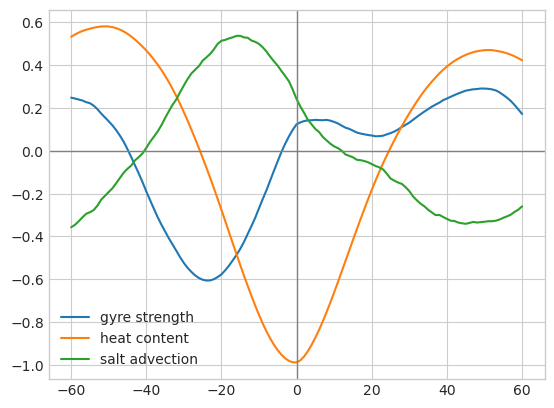

In [25]:
xgfs_normal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
xgfs_normal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
xgfs_bright6 = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133), (238, 238, 238)]
xgfs_dark6 = [(0, 89, 0), (0, 0, 120), (73, 13, 0), (138, 3, 79), (0, 90, 138), (68, 53, 0), (88, 88, 88)]
xgfs_fancy6 = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171), (205, 205, 205)]
xgfs_tarnish6 = [(39, 77, 82), (199, 162, 166), (129, 139, 112), (96, 78, 60), (140, 159, 183), (121, 104, 128), (192, 192, 192)]

marker_list = ['o','v','1','P','X','D','h','*','s','^','.']


with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots()
    ax.plot(lag_years, lag_baro)
    ax.plot(lag_years, lag_heat)
    ax.plot(lag_years, lag_salt)
    ax.legend(['gyre strength', 'heat content', 'salt advection'])
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

plt.show()
# cc = 0
# for mtype in df_plot['type'].unique():
#     plotdata_df = df_plot.loc[df_plot['type'] == mtype]
#     ax.plot(plotdata_df.x, plotdata_df.y, 
#             marker=marker_list[cc], 
#             markeredgecolor = tuple(ti/255 for ti in xgfs_normal12[cc]),
#             markerfacecolor = tuple(ti/255 for ti in xgfs_normal12[cc]),
#             linestyle='', ms=6, label=mtype)
#     cc += 1

# texts=[]
# for ind in df_plot.index:
#     if df_plot['type'][ind] == 'MOM':
#         texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText
#     else:
#         if df_plot['x'][ind]>1:
#             if df_plot['y'][ind]>1:
#                 texts+=[ax.text(df_plot['x'][ind], df_plot['y'][ind], df_plot['name'][ind], fontsize = 8)] # for adjustText

# adjust_text(texts, df_plot.x.values, df_plot.y.values, ax=ax, # avoid_self=True, #force_explode = (0.2, 0.2),
#             time_lim=1, #Give it 1 second instead of 0.1 sec to arrange such dense labels
#             arrowprops=dict(arrowstyle='-', color='gray', alpha=.5))

# ax.set_xlim([-1, 8])
# ax.set_ylim([-1, 8])
# ax.set_aspect('equal', adjustable='box')

# ax.set_xticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_xticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.set_yticks(np.linspace(0,8,5), minor=False) # only the 50% is major
# ax.set_yticks(np.linspace(-1,8,10), minor=True) # all 10th are minor
# ax.grid(which='both', axis='both',alpha=.5) # draw grid
ax.set_xlabel("lagged in ")
# ax.set_ylabel("size polynya (million km$^2$)")
# ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
# # ax.legend(loc="upper left")
